<a href="https://colab.research.google.com/github/miguel-fc/PyTorch-tools/blob/main/nr_RF_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Python related required packages
import gdown
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

In [2]:
!gdown "https://drive.google.com/uc?id=1-6dVAhChOpv8vD-7ZttTVo8qO7ffXiw8"

Downloading...
From: https://drive.google.com/uc?id=1-6dVAhChOpv8vD-7ZttTVo8qO7ffXiw8
To: /content/df_encoded_samples.pkl
100% 94.0k/94.0k [00:00<00:00, 116MB/s]


In [3]:
#Convert the database into a pandas dataframe
df = pd.read_pickle('df_encoded_samples.pkl')

In [4]:
df

,l1,l2,l3,l4,l5,l6,label0,label1,label2,label3
0,0.604396,0.546912,-0.245777,-0.439908,0.685328,-0.469595,0.287,-0.472,-0.295,6.44288
1,0.728486,0.396710,-0.065224,-0.209461,0.618449,-0.446018,0.187,-0.306,-0.016,2.11524
2,0.657652,0.799658,-0.669893,-0.192911,0.437985,-0.225028,0.171,-0.0268,-0.276,1.67659
3,0.642246,0.697609,-0.501855,-0.276576,0.529196,-0.316361,0.248,-0.0528,-0.43,4.17484
4,0.617875,0.924225,-0.848908,-0.230330,0.405493,-0.175499,0.149,-0.0364,-0.296,1.43633
...,...,...,...,...,...,...,...,...,...,...
624,0.563285,0.634429,-0.366006,-0.496577,0.680299,-0.448157,0.268,-0.388,-0.573,13.32268
625,0.433097,0.561412,-0.189799,-0.847456,0.910777,-0.644391,0.284,-0.556,-0.392,1.89451
626,0.694968,0.614177,-0.394023,-0.188393,0.514484,-0.321176,0.207,-0.0988,-0.306,19.01502
627,0.657155,0.473451,-0.153610,-0.347224,0.663807,-0.467169,0.209,-0.499,-0.106,5.37057


In [5]:
def run_rf(data,ldim,in_label):
  #Analyzing individual labels.

  label = in_label
  ld = ldim

#Creating the X database according to data and the dimension of the latent space
  vars = []
  for i in range(ld):
    var = 'l' + str(i+1)
    vars.append(var)

  X = df[vars]
  y = df[label]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=134)

  #Searching for the best rf
  ## Define Grid 
  grid = { 
      'n_estimators': [200,300,400],
      'max_features': ['sqrt','log2'],
      'max_depth' : [3,4,5],
      'random_state' : [18]
  }

  rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
  rf.fit(X_train, y_train)

  # print(rf.best_estimator_)
  # print(rf.best_score_)

  #Fit the best random forest for this label
  # n_rf = RandomForestRegressor(n_estimators = 400, max_depth=3, max_features='sqrt',random_state=18)
  n_rf = rf.best_estimator_
  n_rf.fit(X_train,y_train)

  #Predict labels with the best forest
  y_pred_label = n_rf.predict(X_test)
  print('R^2({}) = '.format(label), n_rf.score(X_test, y_test)*100.0)

  # Plot to compare original and predicted labels 
  # and the feature importance
  fig = plt.figure(figsize=(20, 10))
  ax = fig.add_subplot(1,2,1)
  ax.scatter(y_test,y_pred_label)
  ax.set_xlabel('Actual {}'.format(label))
  ax.set_ylabel('Predicted {}'.format(label))

  ax = fig.add_subplot(1,2,2)
  plt.barh(X_train.columns.values,n_rf.feature_importances_)
  ax.set_xlabel("Random Forest Feature Importance")
  ax.set_title(label)

  plt.show()

  return


R^2(label0) =  -3.9729458428164888


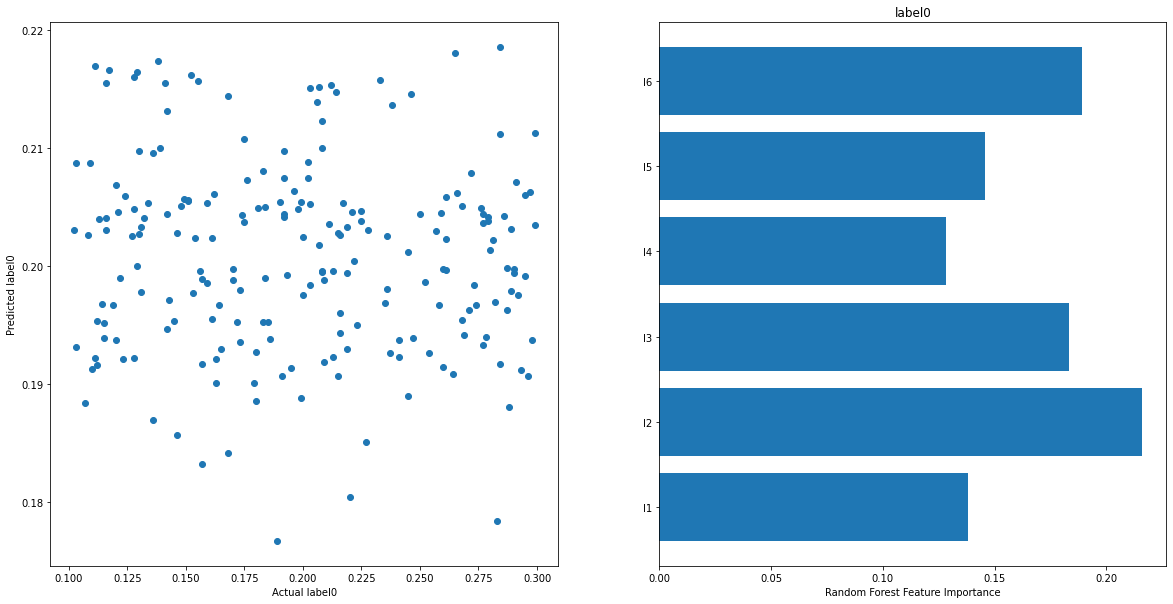

R^2(label1) =  86.81554869211607


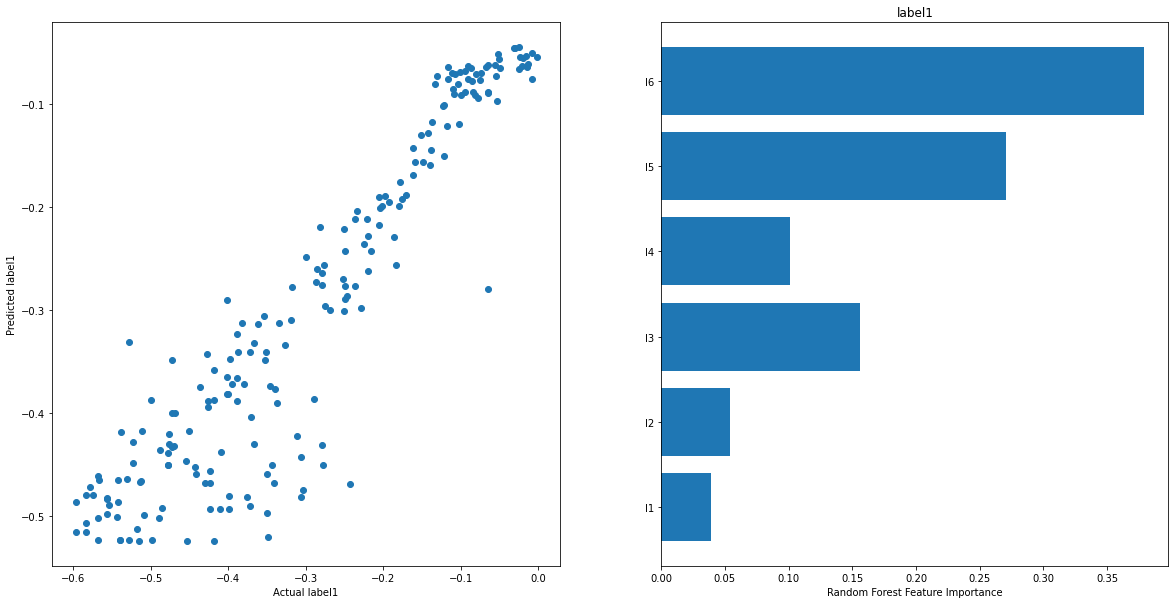

R^2(label2) =  83.48489176150373


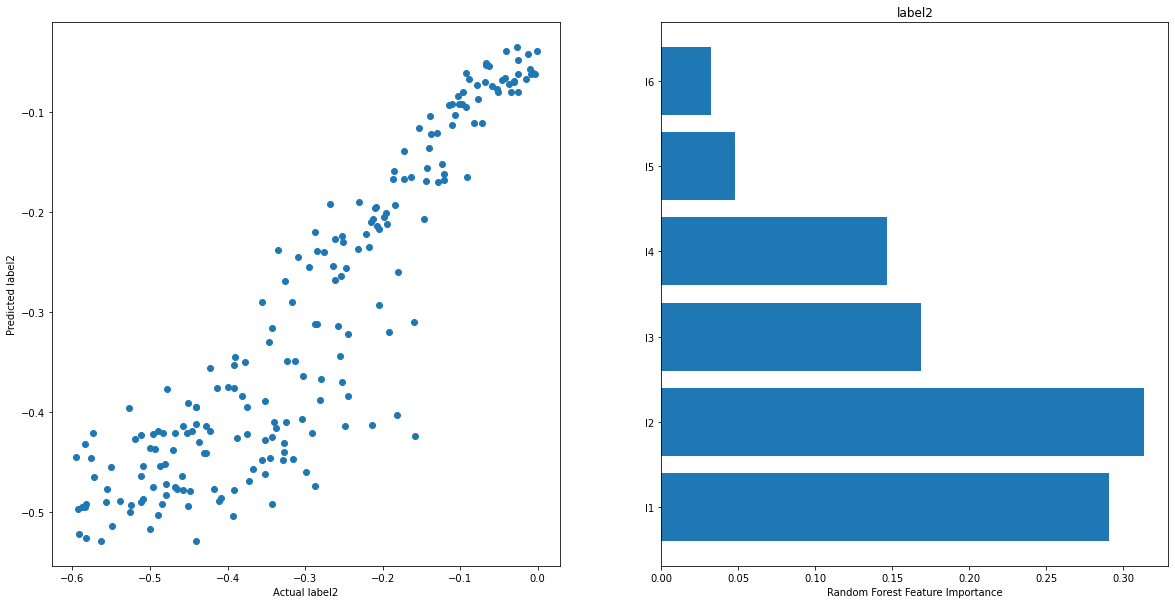

R^2(label3) =  37.6861368933888


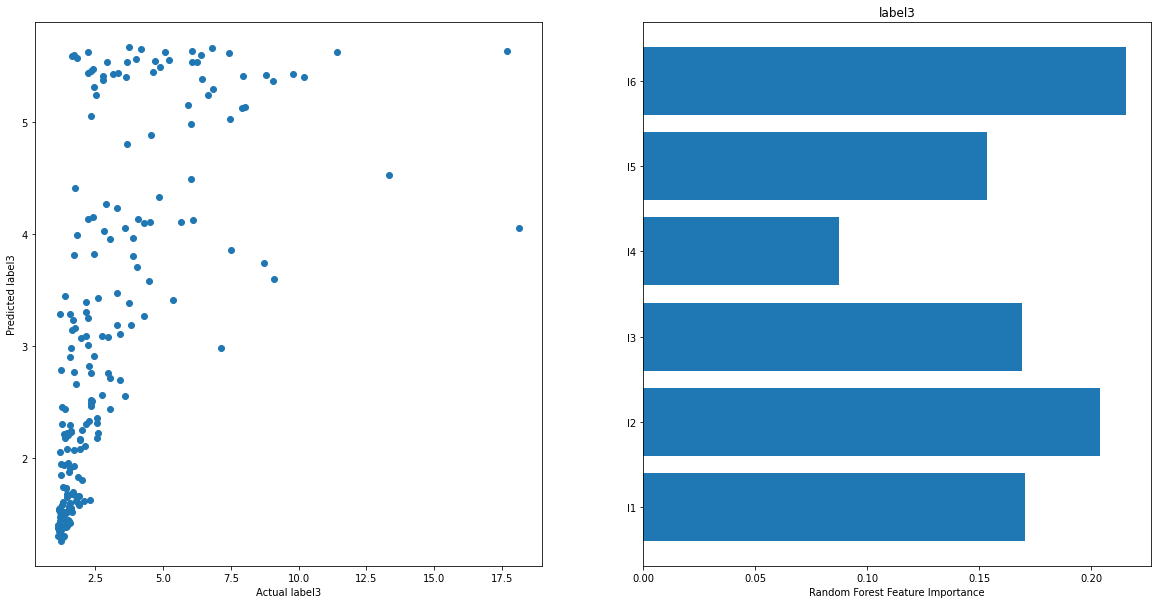

In [6]:
#Input here the name of the dataframe and the
#dimension of the latent space and the number
#of labels 

data = df
ldim = 6
nlabels = 4


#Running the random forest for each label
for i in range(nlabels):
  label = 'label'+str(i)
  # print(label)
  run_rf(data,ldim,label)
